In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings('ignore')
# library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for data processing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# library for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold

# library for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df=pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
pd.set_option("display.max_columns",None) # setting to display all the columns
print("Dataset's shape", df.shape) #shows dimensionality of the dataframe, and shows the number of rows and columns

Dataset's shape (5110, 12)


In [8]:
print('Total rows: ', df.shape[0])
print('Total columns: ', df.shape[1])

Total rows:  5110
Total columns:  12


In [9]:
print(df.columns) #name of the columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [10]:
df.dtypes #data types of each columns

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
df.ndim #dimension

2

In [12]:
df.size #total element

61320

In [13]:
print(df.info()) #shows number of non-null value and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [14]:
df.describe() # basic statistical infos per feature of the dataset

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Drop duplicate

In [15]:
df.drop_duplicates() # it counts the number of duplicate(doest not drop the duplictae)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# # Replacing null values with zero/mean/median

In [16]:
df=df.fillna(value=df['bmi'].mean())

In [17]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


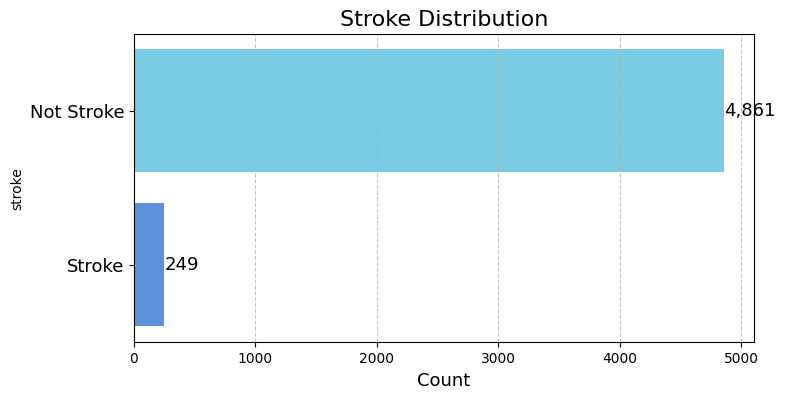

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category in the 'stroke' column
stroke_count = df['stroke'].value_counts()

# Create a horizontal bar plot with more styling
plt.figure(figsize=(8, 4))
sns.barplot(y=stroke_count.index, x=stroke_count.values, palette=['#6AD4F5','#4C8DEF'], orient='h')

# Add annotations to each bar
for index, value in enumerate(stroke_count.values):
    plt.text(value, index, f'{value:,}', fontsize=13, va='center', ha='left', color='black')

# Customize the plot
plt.yticks([0, 1], ['Not Stroke', 'Stroke'], fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title('Stroke Distribution', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

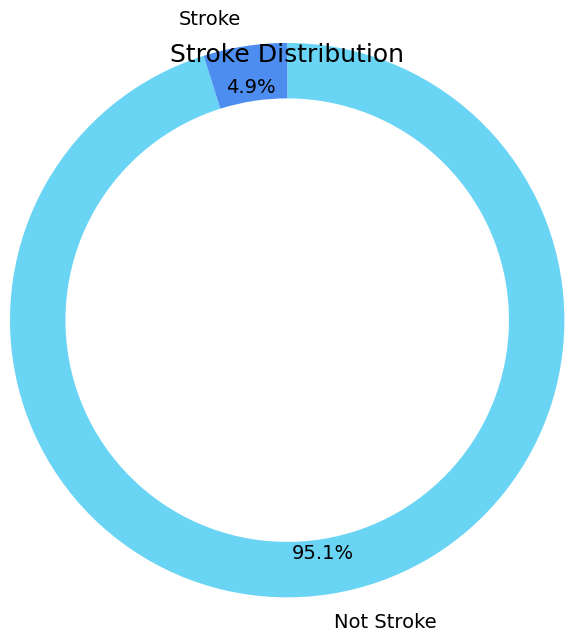

In [21]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'stroke' column
stroke_count = df['stroke'].value_counts()

# Create a donut chart
plt.figure(figsize=(6, 6))
plt.pie(stroke_count, labels=['Not Stroke', 'Stroke'], startangle=90, counterclock=False, 
        wedgeprops={'width': 0.3}, radius=1.5, autopct='%.1f%%', pctdistance=0.85, 
        colors=['#6AD4F5','#4C8DEF'], textprops={'fontsize': 14})

# Add a circle at the center to create a donut shape
centre_circle = plt.Circle((0, 0), 1, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Customize and show the plot
plt.title('Stroke Distribution', fontsize=18, pad=20)
plt.show()

# One-Hot Encoding

In [22]:
# onehot encoding for categorical feature
df = pd.get_dummies(df)
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False


# SMOTE

In [24]:
# separate feature and target
X = df.drop(columns = ['stroke'])
y = df['stroke']

In [25]:

# using SMOTE Techniqe
sm = SMOTE(random_state=111)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(5110, 22)
Shape of X after SMOTE:(9722, 22) 


Target Class distributuion before SMOTE:
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64
Target Class distributuion after SMOTE :
stroke
1    0.5
0    0.5
Name: proportion, dtype: float64


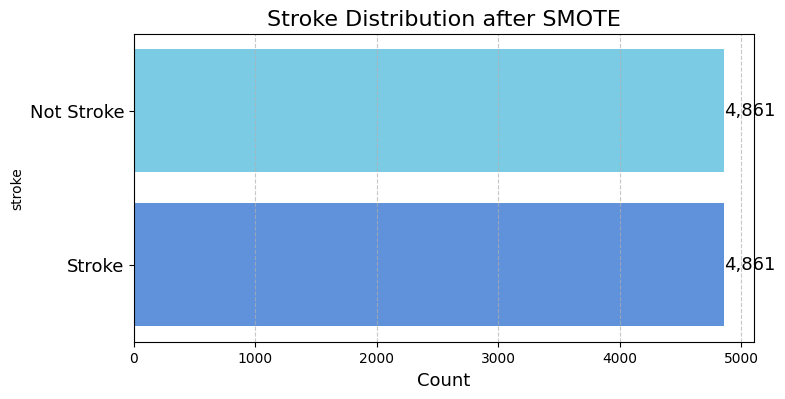

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the occurrences of each category in the resampled target variable
stroke_count = y_resampled.value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(8, 4))
sns.barplot(y=stroke_count.index, x=stroke_count.values, palette=['#6AD4F5', '#4C8DEF'], orient='h')

# Add annotations to each bar
for index, value in enumerate(stroke_count.values):
    plt.text(value, index, f'{value:,}', fontsize=13, va='center', ha='left', color='black')

# Customize the plot
plt.yticks([0, 1], ['Not Stroke', 'Stroke'], fontsize=13)
plt.xlabel('Count', fontsize=13)
plt.title('Stroke Distribution after SMOTE', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size = .2,random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7777, 22), (7777,), (1945, 22), (1945,))

# Scaling

In [29]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Machine Learning Modeling

In [30]:
# Create simple model
baseline_model = KNeighborsClassifier()
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)
# Simple model report
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,baseline_model.predict(X_train)))

baseline_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_report).transpose()

Testing-set Accuracy score is: 0.9583547557840617
Training-set Accuracy score is: 0.9731258840169731


,precision,recall,f1-score,support
No Stroke,0.945219,0.973333,0.959070,975.000000
Stroke,0.972370,0.943299,0.957614,970.000000
accuracy,0.958355,0.958355,0.958355,0.958355
macro avg,0.958794,0.958316,0.958342,1945.000000
weighted avg,0.958760,0.958355,0.958344,1945.000000


In [33]:
# Seek for the best hyperparameter with HalvingGridSearchCV
new_param = HalvingGridSearchCV(baseline_model, 
                                param_grid, 
                                cv=StratifiedKFold(n_splits=3, random_state= 123, shuffle=True),
                                resource='leaf_size',
                                max_resources=20,
                                scoring='recall',
                                aggressive_elimination=False).fit(X_train, y_train)
# Result of the hyperparameter tuning
print(f"Best Hyperparameter {new_param.best_estimator_} with score {new_param.best_score_}")

# Set the model with the best hyperparameter
model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1, weights='distance')
model.fit(X_train, y_train)

# Set the model with the best hyperparameter
model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1, weights='distance')
model.fit(X_train, y_train)
# Test tuned model with test data
y_pred = model.predict(X_test) 
# Tuned model report
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,model.predict(X_train)))

improvement_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(improvement_report).transpose()

Best Hyperparameter KNeighborsClassifier(leaf_size=18, metric='manhattan', n_neighbors=3,
                     weights='distance') with score 0.95733744538679
Testing-set Accuracy score is: 0.9511568123393316
Training-set Accuracy score is: 1.0


,precision,recall,f1-score,support
No Stroke,0.958333,0.943590,0.950904,975.000000
Stroke,0.944162,0.958763,0.951407,970.000000
accuracy,0.951157,0.951157,0.951157,0.951157
macro avg,0.951248,0.951176,0.951156,1945.000000
weighted avg,0.951266,0.951157,0.951155,1945.000000


<Axes: >

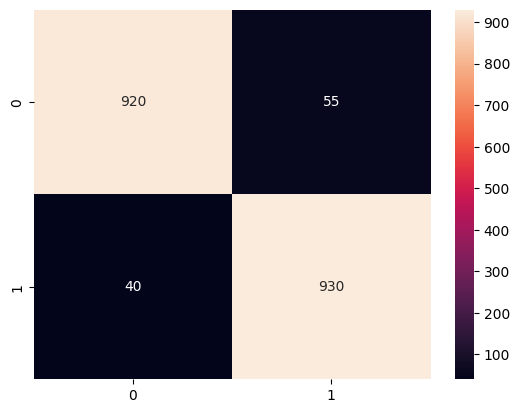

In [34]:
acc = confusion_matrix(y_test, y_pred)
sns.heatmap(acc, annot = True, fmt = "d")

# SVM without grid search

In [35]:
# Create simple model
baseline_model = SVC()
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)
# Simple model report
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,baseline_model.predict(X_train)))

baseline_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_report).transpose()

Testing-set Accuracy score is: 0.9526992287917738
Training-set Accuracy score is: 0.9624533881959625


,precision,recall,f1-score,support
No Stroke,0.913777,1.000000,0.954946,975.000000
Stroke,1.000000,0.905155,0.950216,970.000000
accuracy,0.952699,0.952699,0.952699,0.952699
macro avg,0.956888,0.952577,0.952581,1945.000000
weighted avg,0.956778,0.952699,0.952587,1945.000000


In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize the SVC model
svc_model = SVC()

# Perform hyperparameter tuning with RandomizedSearchCV
rcv = RandomizedSearchCV(svc_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy', random_state=123)
rcv.fit(X_train, y_train)

# Display the best hyperparameters found
print(f"Best Hyperparameters: {rcv.best_params_}")
print(f"Best Cross-Validation Score: {rcv.best_score_}")

# Set the model with the best hyperparameters
best_svc_model = rcv.best_estimator_
best_svc_model.fit(X_train, y_train)

# Test the tuned model with test data
y_pred = best_svc_model.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:', accuracy_score(y_train, best_svc_model.predict(X_train)))

# Generate the classification report
improvement_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(improvement_report).transpose()

Best Hyperparameters: {'gamma': 0.01, 'C': 100}
Best Cross-Validation Score: 0.9616827713900757
Testing-set Accuracy score is: 0.9521850899742931
Training-set Accuracy score is: 0.9665680853799665


,precision,recall,f1-score,support
No Stroke,0.916038,0.995897,0.954300,975.000000
Stroke,0.995480,0.908247,0.949865,970.000000
accuracy,0.952185,0.952185,0.952185,0.952185
macro avg,0.955759,0.952072,0.952082,1945.000000
weighted avg,0.955657,0.952185,0.952088,1945.000000


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Create a simple Random Forest model
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred = baseline_model.predict(X_test)

# Simple model report
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:', accuracy_score(y_train, baseline_model.predict(X_train)))

# Generate the classification report
baseline_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_report).transpose()

Testing-set Accuracy score is: 0.9686375321336761
Training-set Accuracy score is: 1.0


,precision,recall,f1-score,support
No Stroke,0.945419,0.994872,0.969515,975.000000
Stroke,0.994559,0.942268,0.967708,970.000000
accuracy,0.968638,0.968638,0.968638,0.968638
macro avg,0.969989,0.968570,0.968612,1945.000000
weighted avg,0.969926,0.968638,0.968614,1945.000000


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30, 40, 50],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                  # Method of selecting samples for training each tree
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning with RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_model, 
                                      param_distributions=param_grid, 
                                      n_iter=100, 
                                      cv=5, 
                                      verbose=2, 
                                      random_state=42, 
                                      n_jobs=-1)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Display the best hyperparameters found
print(f"Best Hyperparameters: {rf_random_search.best_params_}")

# Set the model with the best hyperparameters
best_rf_model = rf_random_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Test the tuned model with test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:', accuracy_score(y_train, best_rf_model.predict(X_train)))

# Generate the classification report
improvement_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(improvement_report).transpose()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   5.8s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.8s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, m

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   5.9s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.8s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.8s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.2s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=50,

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   5.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   5.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.2s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, ma

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   5.8s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.8s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.8s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.2s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=50,

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   5.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   4.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   4.7s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   5.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   3.1s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=3

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   5.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   3.1s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.4s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.4s
[CV] END bootstrap=True, max_depth=30, max_

,precision,recall,f1-score,support
No Stroke,0.944606,0.996923,0.970060,975.000000
Stroke,0.996725,0.941237,0.968187,970.000000
accuracy,0.969152,0.969152,0.969152,0.969152
macro avg,0.970666,0.969080,0.969123,1945.000000
weighted avg,0.970599,0.969152,0.969126,1945.000000


In [6]:
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
data.drop('id', axis= 1, inplace= True)

In [8]:
data.shape

(5110, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [56]:
data[['hypertension', 'heart_disease', 'stroke']] = data[['hypertension', 'heart_disease', 'stroke']].astype(str)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB


In [58]:
data.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


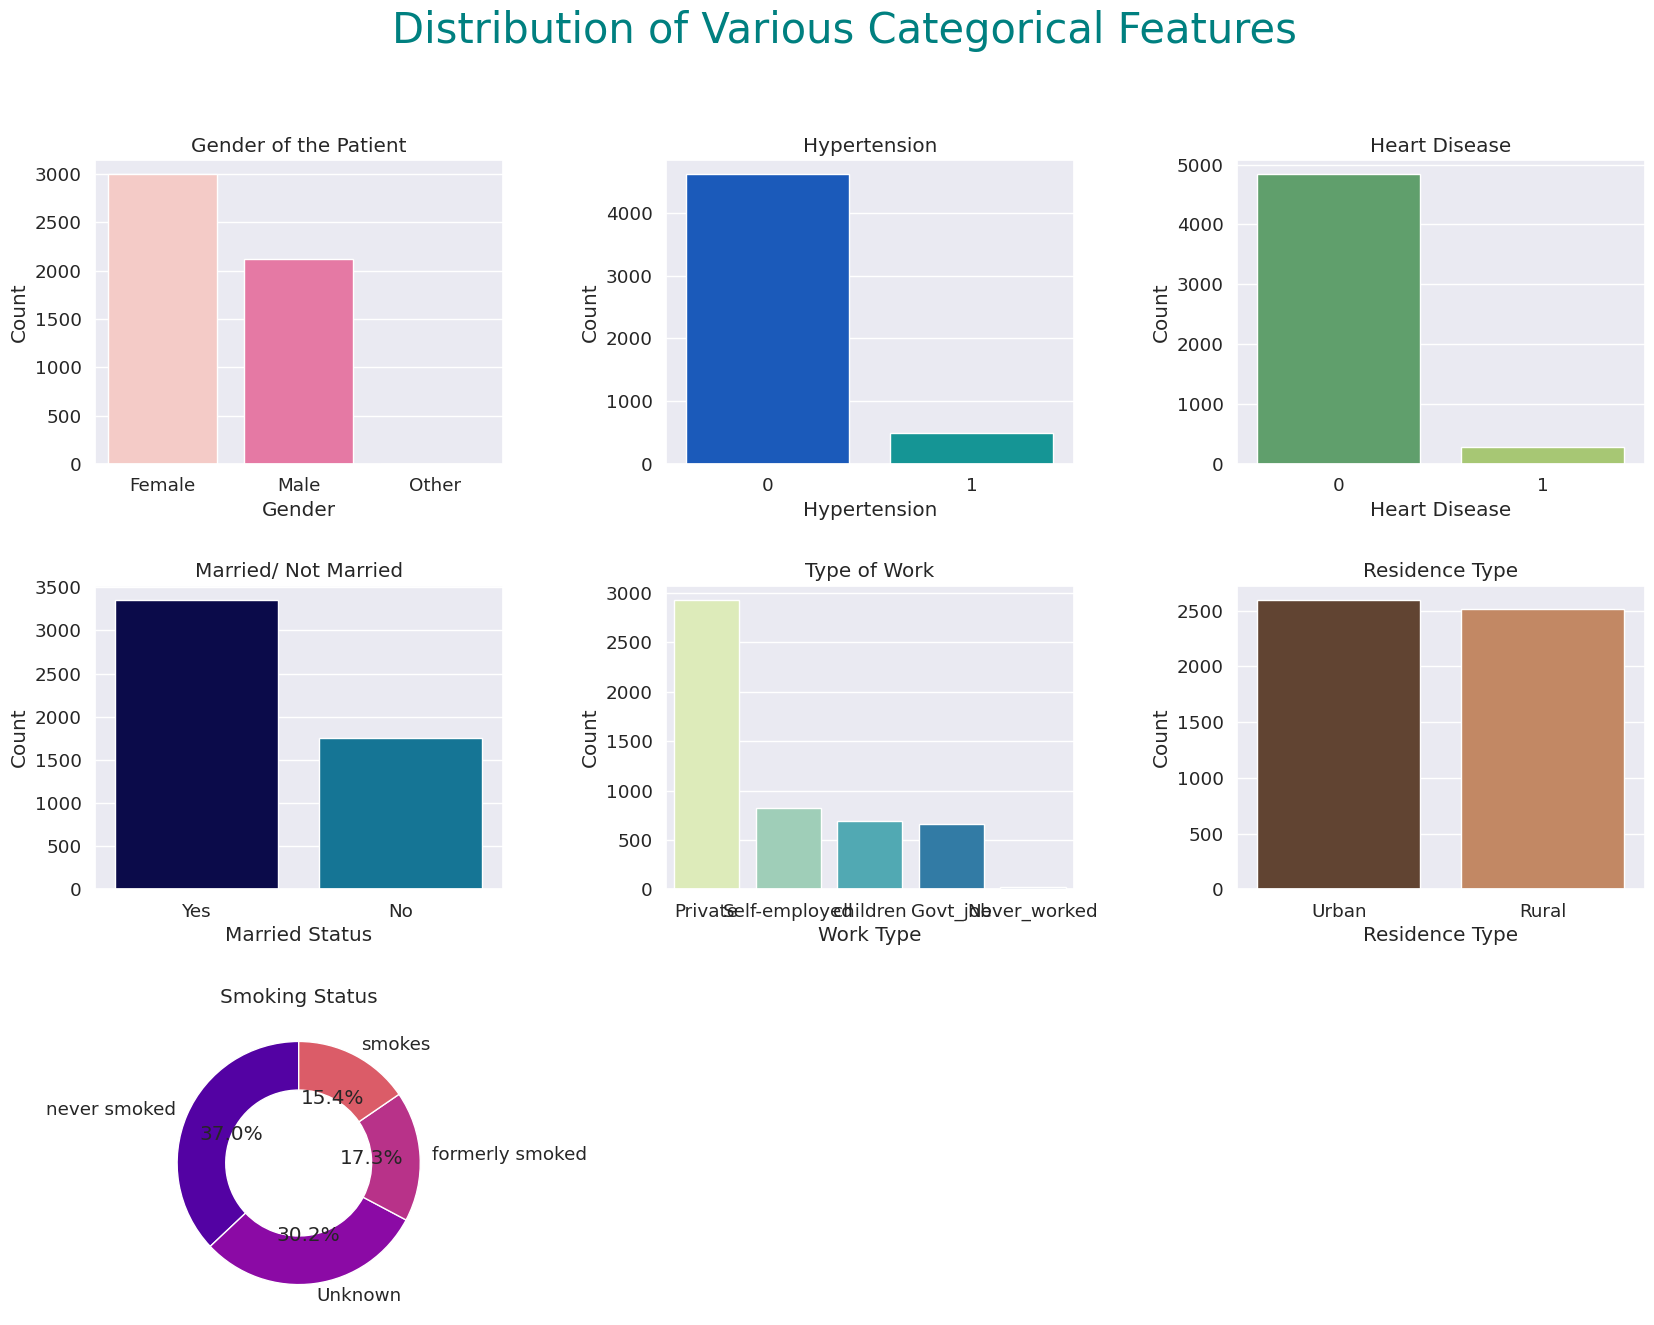

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a grid of subplots
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.suptitle('Distribution of Various Categorical Features', fontsize=30, color='teal')

# Plot for Gender
sns.barplot(x=data['gender'].value_counts().index, y=data['gender'].value_counts().values, ax=ax[0, 0], palette='RdPu')
ax[0, 0].set_title('Gender of the Patient')
ax[0, 0].set_xlabel('Gender')
ax[0, 0].set_ylabel('Count')

# Plot for Hypertension
sns.barplot(x=data['hypertension'].value_counts().index, y=data['hypertension'].value_counts().values, ax=ax[0, 1], palette='winter')
ax[0, 1].set_title('Hypertension')
ax[0, 1].set_xlabel('Hypertension')
ax[0, 1].set_ylabel('Count')

# Plot for Heart Disease
sns.barplot(x=data['heart_disease'].value_counts().index, y=data['heart_disease'].value_counts().values, ax=ax[0, 2], palette='summer')
ax[0, 2].set_title('Heart Disease')
ax[0, 2].set_xlabel('Heart Disease')
ax[0, 2].set_ylabel('Count')

# Plot for Ever Married
sns.barplot(x=data['ever_married'].value_counts().index, y=data['ever_married'].value_counts().values, ax=ax[1, 0], palette='ocean')
ax[1, 0].set_title('Married/ Not Married')
ax[1, 0].set_xlabel('Married Status')
ax[1, 0].set_ylabel('Count')

# Plot for Work Type
sns.barplot(x=data['work_type'].value_counts().index, y=data['work_type'].value_counts().values, ax=ax[1, 1], palette='YlGnBu')
ax[1, 1].set_title('Type of Work')
ax[1, 1].set_xlabel('Work Type')
ax[1, 1].set_ylabel('Count')

# Plot for Residence Type
sns.barplot(x=data['Residence_type'].value_counts().index, y=data['Residence_type'].value_counts().values, ax=ax[1, 2], palette='copper')
ax[1, 2].set_title('Residence Type')
ax[1, 2].set_xlabel('Residence Type')
ax[1, 2].set_ylabel('Count')

# Plot for Smoking Status
sizes = data['smoking_status'].value_counts()
ax[2, 0].pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=sns.color_palette('plasma'), startangle=90, wedgeprops={'width': 0.4})
ax[2, 0].set_title('Smoking Status')

# Remove empty subplot
ax[2, 1].axis('off')
ax[2, 2].axis('off')

plt.show()

In [60]:
data.drop(data[data['gender'] == 'Other'].index, inplace= True)

In [61]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale= 1.2)

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

from imblearn.over_sampling import RandomOverSampler

In [33]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 33.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.2 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, b

In [38]:
pip install --upgrade --force-reinstall scikitplot

ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot
Note: you may need to restart the kernel to use updated packages.


In [64]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [66]:
data1 = knn_impute(data, 'bmi')

In [67]:
data1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [68]:
data2 = pd.get_dummies(data1, drop_first= True)

In [24]:
data2.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.60,True,False,True,True,False,True,False,False,True,True,False,False,True
1,61.0,202.21,31.38,False,False,False,True,False,False,True,False,False,False,True,False,True
2,80.0,105.92,32.50,True,False,True,True,False,True,False,False,False,False,True,False,True
3,49.0,171.23,34.40,False,False,False,True,False,True,False,False,True,False,False,True,True
4,79.0,174.12,24.00,False,True,False,True,False,False,True,False,False,False,True,False,True


In [69]:
s = StandardScaler()
data2[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(data2[['bmi', 'avg_glucose_level', 'age']])

In [70]:
data3 = data2.copy()
data3.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,1.051242,2.706450,0.985867,True,False,True,True,False,True,False,False,True,True,False,False,True
1,0.785889,2.121652,0.313618,False,False,False,True,False,False,True,False,False,False,True,False,True
2,1.626174,-0.004867,0.457855,True,False,True,True,False,True,False,False,False,False,True,False,True
3,0.255182,1.437473,0.702544,False,False,False,True,False,True,False,False,True,False,False,True,True
4,1.581949,1.501297,-0.636804,False,True,False,True,False,False,True,False,False,False,True,False,True


In [72]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=data3.drop(['stroke_1'],axis=1)
y=data3['stroke_1']
X_over, y_over = oversample.fit_resample(X, y)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.2, random_state= 42)

In [74]:
print(y_train.value_counts())
print(y_test.value_counts())

stroke_1
True     3892
False    3884
Name: count, dtype: int64
stroke_1
False    976
True     968
Name: count, dtype: int64


In [ ]:
KNN

Accuracy: 0.9747942386831275
ROC AUC Score: 0.9748975409836066


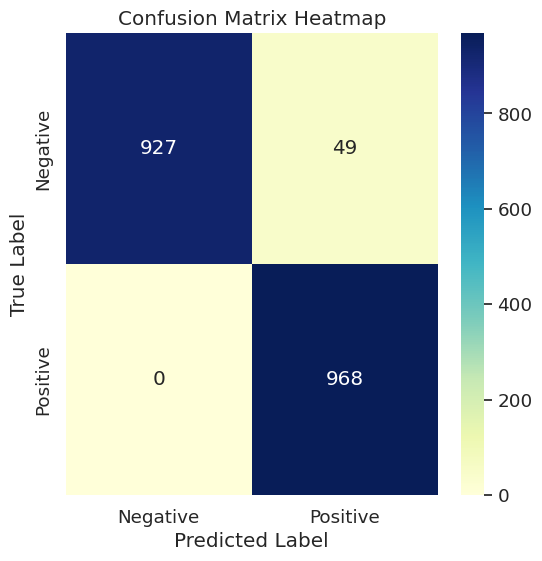

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit KNN model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Print accuracy and ROC AUC Score
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Create a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# svm

Accuracy: 1.0
ROC AUC Score: 1.0


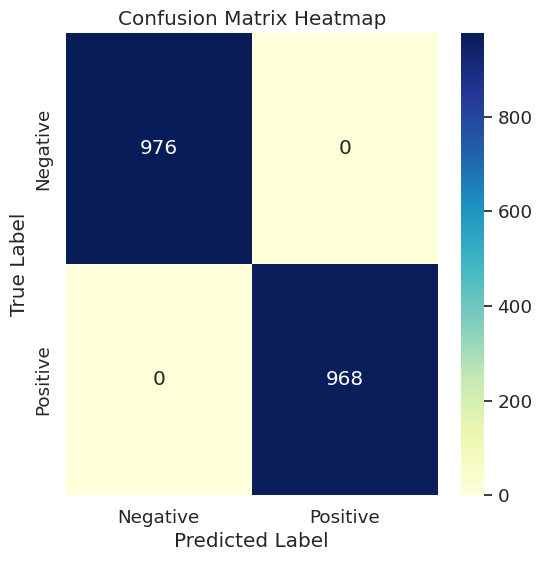

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Define parameters for RandomizedSearchCV
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 100, 1000]
}

# Initialize and fit RandomizedSearchCV with SVC
svm = RandomizedSearchCV(SVC(probability=True), parameters, cv=5)
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

# Print accuracy and ROC AUC Score
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_svm))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Create a heatmap with Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Random Forest

Accuracy: 0.9943415637860082
ROC AUC Score: 1.0


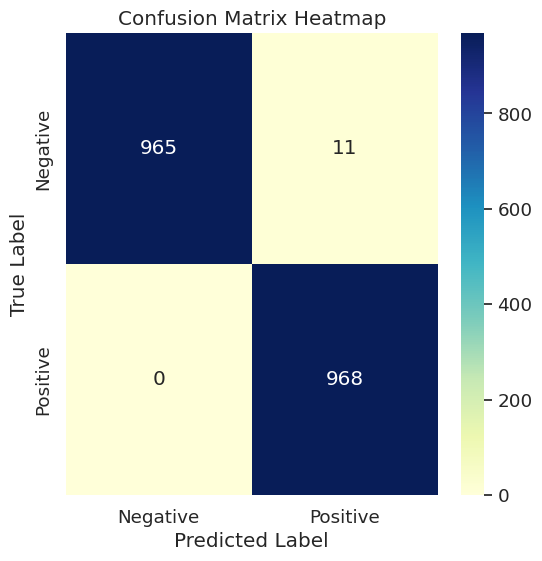

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Print accuracy and ROC AUC Score
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap with Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Catboost 

Accuracy: 0.963477366255144
ROC AUC Score: 0.996478500541932


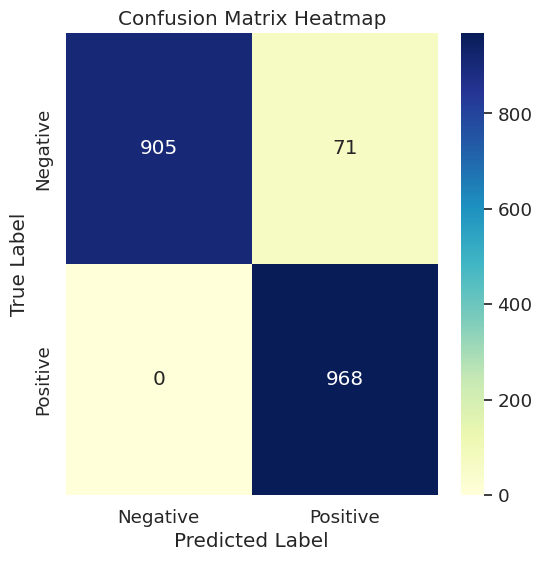

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from catboost import CatBoostClassifier

# Initialize and fit CatBoost model
cb = CatBoostClassifier(verbose=0)
cb.fit(X_train, y_train)

# Make predictions
y_pred_cb = cb.predict(X_test)
y_pred_prob_cb = cb.predict_proba(X_test)[:, 1]

# Print accuracy and ROC AUC Score
print('Accuracy:', accuracy_score(y_test, y_pred_cb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_cb))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_cb)

# Create a heatmap with Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# XGBoost 

Accuracy: 0.9763374485596708
ROC AUC Score: 0.9975073245495191


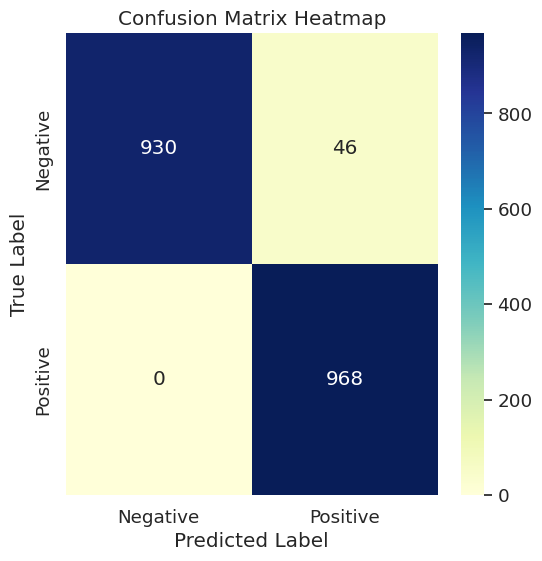

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from xgboost import XGBClassifier

# Initialize and fit XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Print accuracy and ROC AUC Score
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Create a heatmap with Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3892, number of negative: 3884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 7776, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500514 -> initscore=0.002058
[LightGBM] [Info] Start training from score 0.002058
Accuracy: 0.963477366255144
ROC AUC Score: 0.997452284582035


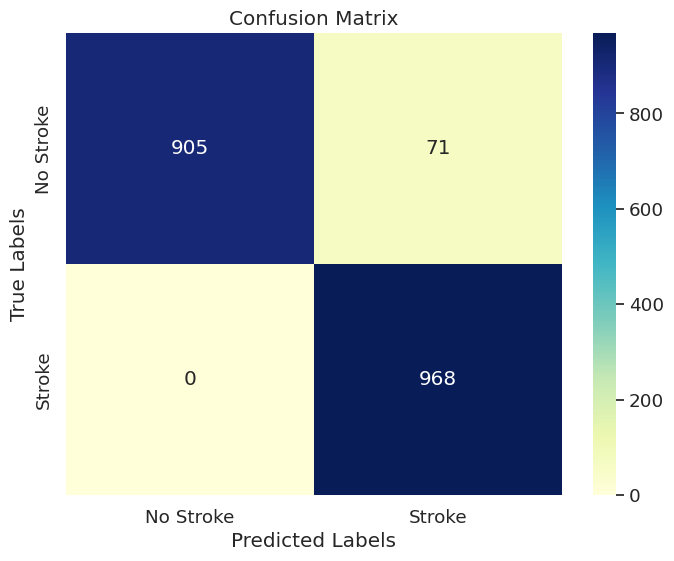

In [86]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier()

# Fit the model
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)
y_pred_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Print accuracy and ROC AUC Score
print('Accuracy:', accuracy_score(y_test, y_pred_lgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_lgb))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['No Stroke', 'Stroke'], 
            yticklabels=['No Stroke', 'Stroke'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
MLP classifier

Accuracy: 0.9526748971193416
ROC AUC Score: 0.9803951869665357


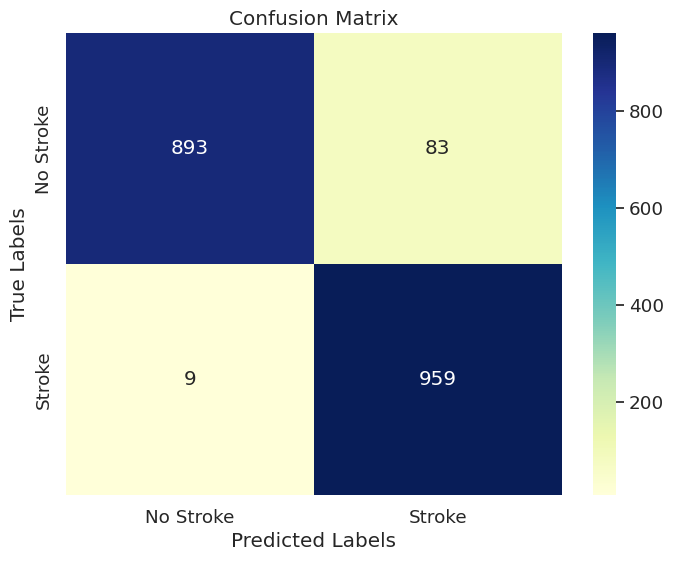

In [97]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,),  # Single hidden layer with 100 neurons
                    activation='relu',  # Rectified Linear Unit activation function
                    solver='adam',  # Optimizer
                    random_state=42,
                    max_iter=1000)  # Maximum number of iterations

# Fit the model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)
y_pred_prob_mlp = mlp.predict_proba(X_test)[:, 1]

# Print accuracy and ROC AUC Score
print('Accuracy:', accuracy_score(y_test, y_pred_mlp))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_mlp))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['No Stroke', 'Stroke'], 
            yticklabels=['No Stroke', 'Stroke'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [92]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.6 MB/s eta 0:00:00


epoch 0  | loss: 0.71155 |  0:00:00s
epoch 1  | loss: 0.51292 |  0:00:01s
epoch 2  | loss: 0.48738 |  0:00:01s
epoch 3  | loss: 0.49055 |  0:00:01s
epoch 4  | loss: 0.4793  |  0:00:01s
epoch 5  | loss: 0.47644 |  0:00:02s
epoch 6  | loss: 0.47702 |  0:00:02s
epoch 7  | loss: 0.46698 |  0:00:02s
epoch 8  | loss: 0.47053 |  0:00:02s
epoch 9  | loss: 0.4604  |  0:00:03s
epoch 10 | loss: 0.46431 |  0:00:03s
epoch 11 | loss: 0.46043 |  0:00:03s
epoch 12 | loss: 0.46215 |  0:00:04s
epoch 13 | loss: 0.45577 |  0:00:04s
epoch 14 | loss: 0.45741 |  0:00:04s
epoch 15 | loss: 0.45598 |  0:00:04s
epoch 16 | loss: 0.44901 |  0:00:05s
epoch 17 | loss: 0.45931 |  0:00:05s
epoch 18 | loss: 0.4497  |  0:00:05s
epoch 19 | loss: 0.4516  |  0:00:05s
epoch 20 | loss: 0.45179 |  0:00:06s
epoch 21 | loss: 0.45325 |  0:00:06s
epoch 22 | loss: 0.45077 |  0:00:06s
epoch 23 | loss: 0.4442  |  0:00:06s
epoch 24 | loss: 0.44799 |  0:00:07s
epoch 25 | loss: 0.44308 |  0:00:07s
epoch 26 | loss: 0.44794 |  0:00:07s
e

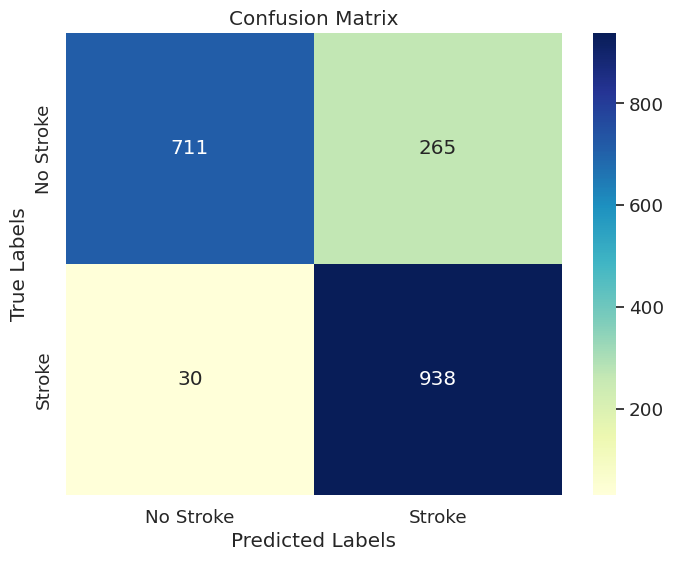

In [103]:
import pandas as pd
import numpy as np

# Ensure that the data is in the correct numeric format
X_train_np = X_train.select_dtypes(include=[np.number]).values
X_test_np = X_test.select_dtypes(include=[np.number]).values
y_train_np = y_train.values.ravel()  # Use ravel() to convert to 1D array
y_test_np = y_test.values.ravel()  # Use ravel() to convert to 1D array

# Initialize the TabNet model
tabnet = TabNetClassifier()

# Fit the model
tabnet.fit(X_train_np, y_train_np, max_epochs=300, batch_size=2024, virtual_batch_size=128)

# Predict on the test set
y_pred_tabnet = tabnet.predict(X_test_np)
y_pred_prob_tabnet = tabnet.predict_proba(X_test_np)[:, 1]

# Print accuracy and ROC AUC Score
print('Accuracy:', accuracy_score(y_test, y_pred_tabnet))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_tabnet))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_tabnet)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['No Stroke', 'Stroke'], 
            yticklabels=['No Stroke', 'Stroke'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

epoch 0  | loss: 0.66297 |  0:00:01s
epoch 1  | loss: 0.49596 |  0:00:03s
epoch 2  | loss: 0.49272 |  0:00:04s
epoch 3  | loss: 0.46821 |  0:00:05s
epoch 4  | loss: 0.45978 |  0:00:06s
epoch 5  | loss: 0.46066 |  0:00:07s
epoch 6  | loss: 0.45143 |  0:00:08s
epoch 7  | loss: 0.45141 |  0:00:09s
epoch 8  | loss: 0.44341 |  0:00:10s
epoch 9  | loss: 0.44983 |  0:00:12s
epoch 10 | loss: 0.44172 |  0:00:13s
epoch 11 | loss: 0.4375  |  0:00:14s
epoch 12 | loss: 0.43913 |  0:00:15s
epoch 13 | loss: 0.42456 |  0:00:16s
epoch 14 | loss: 0.4252  |  0:00:17s
epoch 15 | loss: 0.42313 |  0:00:19s
epoch 16 | loss: 0.43593 |  0:00:20s
epoch 17 | loss: 0.44435 |  0:00:21s
epoch 18 | loss: 0.42577 |  0:00:22s
epoch 19 | loss: 0.43019 |  0:00:23s
epoch 20 | loss: 0.42688 |  0:00:24s
epoch 21 | loss: 0.42346 |  0:00:26s
epoch 22 | loss: 0.41893 |  0:00:27s
epoch 23 | loss: 0.41621 |  0:00:28s
epoch 24 | loss: 0.42462 |  0:00:29s
epoch 25 | loss: 0.42985 |  0:00:30s
epoch 26 | loss: 0.41039 |  0:00:31s
e

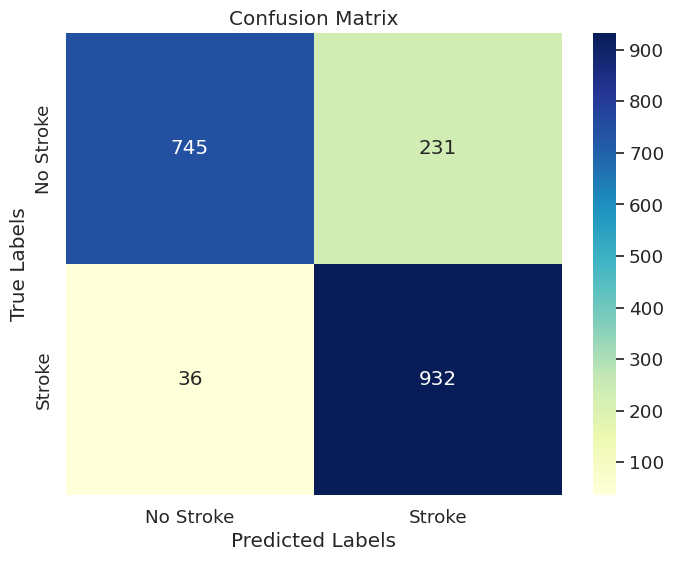

In [104]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import numpy as np

# Optional: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_np, y_train_np)

# Initialize the TabNet model with custom parameters
tabnet = TabNetClassifier(
    n_d=32,  # Dimensionality of the decision prediction layer (can be tuned)
    n_a=32,  # Dimensionality of the attention embedding (can be tuned)
    n_steps=5,  # Number of steps in the architecture (can be tuned)
    gamma=1.5,  # Relaxation parameter for the binary mask (can be tuned)
    lambda_sparse=1e-3,  # Sparsity regularization (can be tuned)
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-3),  # Learning rate
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,  # Learning rate scheduler
    mask_type="entmax"  # Sparsemax: "sparsemax", "entmax" can be tuned
)

# Fit the model on the SMOTE-applied data
tabnet.fit(
    X_train_smote, y_train_smote,
    max_epochs=200,  # Increase the number of epochs
    patience=20,  # Early stopping patience
    batch_size=512,  # Smaller batch size
    virtual_batch_size=128,  # Virtual batch size
    num_workers=0,
    weights=1,  # Class weights for imbalanced data
    drop_last=False
)

# Predict on the test set
y_pred_tabnet = tabnet.predict(X_test_np)
y_pred_prob_tabnet = tabnet.predict_proba(X_test_np)[:, 1]

# Print accuracy and ROC AUC Score
print('Accuracy:', accuracy_score(y_test, y_pred_tabnet))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_tabnet))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_tabnet)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['No Stroke', 'Stroke'], 
            yticklabels=['No Stroke', 'Stroke'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

epoch 0  | loss: 0.89527 |  0:00:00s
epoch 1  | loss: 0.55287 |  0:00:01s
epoch 2  | loss: 0.49672 |  0:00:01s
epoch 3  | loss: 0.46742 |  0:00:02s
epoch 4  | loss: 0.46273 |  0:00:02s
epoch 5  | loss: 0.45423 |  0:00:03s
epoch 6  | loss: 0.43952 |  0:00:03s
epoch 7  | loss: 0.43057 |  0:00:03s
epoch 8  | loss: 0.4177  |  0:00:04s
epoch 9  | loss: 0.41834 |  0:00:04s
epoch 10 | loss: 0.41003 |  0:00:05s
epoch 11 | loss: 0.39876 |  0:00:05s
epoch 12 | loss: 0.3962  |  0:00:06s
epoch 13 | loss: 0.38441 |  0:00:06s
epoch 14 | loss: 0.37204 |  0:00:07s
epoch 15 | loss: 0.37987 |  0:00:07s
epoch 16 | loss: 0.38405 |  0:00:08s
epoch 17 | loss: 0.3854  |  0:00:08s
epoch 18 | loss: 0.37799 |  0:00:09s
epoch 19 | loss: 0.37733 |  0:00:09s
epoch 20 | loss: 0.39727 |  0:00:10s
epoch 21 | loss: 0.40306 |  0:00:10s
epoch 22 | loss: 0.37751 |  0:00:11s
epoch 23 | loss: 0.36382 |  0:00:11s
epoch 24 | loss: 0.35959 |  0:00:12s
epoch 25 | loss: 0.35283 |  0:00:12s
epoch 26 | loss: 0.34822 |  0:00:13s
e

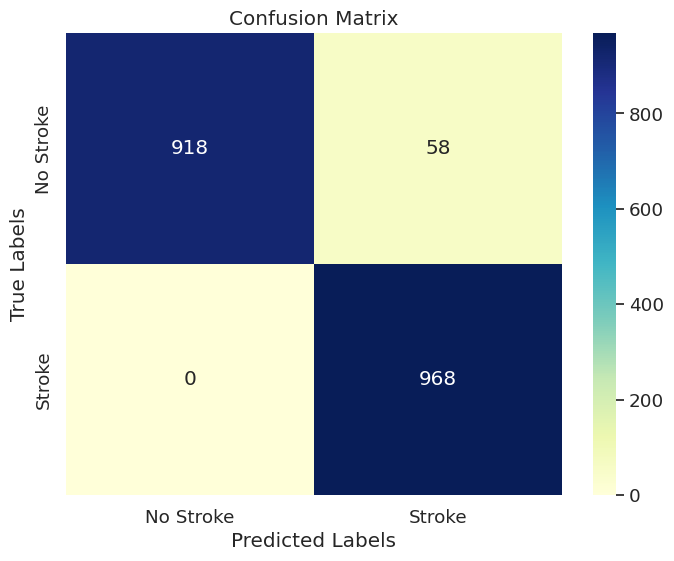

In [108]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import numpy as np

# Ensure that the data is in the correct format
X_train_np = np.array(X_train.values, dtype=np.float32)
y_train_np = np.array(y_train.values.ravel(), dtype=np.int64)
X_test_np = np.array(X_test.values, dtype=np.float32)
y_test_np = np.array(y_test.values.ravel(), dtype=np.int64)

# Initialize the TabNet model with specified parameters
tabnet = TabNetClassifier(
    n_d=8,  # Number of decision steps
    n_a=32,  # Number of attention heads
    gamma=1.3,  # Regularization parameter
    lambda_sparse=0.0001  # Sparsity regularization
)

# Fit the model
tabnet.fit(
    X_train_np, y_train_np,
    max_epochs=200,
    patience=10,
)

# Predict on the test set
y_pred_tabnet = tabnet.predict(X_test_np)
y_pred_prob_tabnet = tabnet.predict_proba(X_test_np)[:, 1]

# Print accuracy and ROC AUC Score
print('Accuracy:', accuracy_score(y_test_np, y_pred_tabnet))
print('ROC AUC Score:', roc_auc_score(y_test_np, y_pred_prob_tabnet))

# Compute the confusion matrix
cm = confusion_matrix(y_test_np, y_pred_tabnet)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['No Stroke', 'Stroke'], 
            yticklabels=['No Stroke', 'Stroke'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()